# Circle avoidance

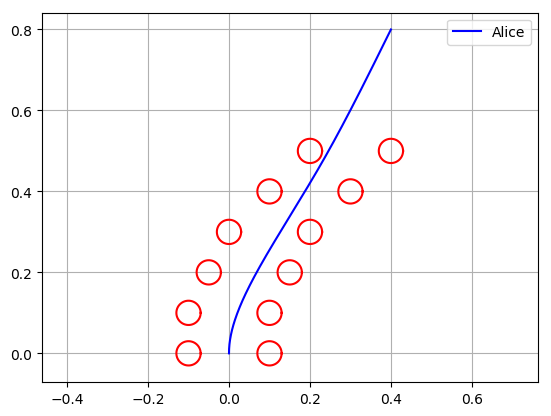

Optimal
Total energy: 1.2856970229346947
Meeting location: (0.4, 0.8)


In [4]:
using JuMP, Gurobi, PyPlot, Ipopt

# Define model, variables, constraints, objective
m = Model(solver=IpoptSolver(print_level=0))

time = 200
start = [0, 0]
finish = [.4, .8]
#time_step = 36
circles = [-0.1 0;
            0.1 0;
            -0.1 0.1;
            0.1 0.1
            0.15 0.2;
            -0.05 0.2;
            0.2 0.3;
            0 0.3;
            0.3 0.4;
            0.1 0.4;
            0.4 0.5;
            0.2 0.5]
r = 0.03

num_circles, dim = size(circles)

@variable(m, x_A[1:2, 1:time])
@variable(m, v_A[1:2, 1:time])
@variable(m, u_A[1:2, 1:time])

# x index on east/west, y index on north/south
@constraint(m, x_A[:, 1] .== start) # Alice's initial position
@constraint(m, v_A[:, 1] .== [0, 10]) # Alice's initial velocity 

# Our practice constraints
# for t in 34:36
#     #@constraint(m, (x_A[2, t] >= upper_bound))
#     @constraint(m, (x_A[2, t] <= lower_bound))
# end

for t in 1:time
    for c in 1:num_circles
    @NLconstraint(m, sqrt( (x_A[1,t]-circles[c,1])^2 + (x_A[2,t]-circles[c,2])^2 ) >= r + 0.01) 
    end
end

# Dynamic equations
for t in 1:time-1
    @constraint(m, x_A[:, t+1] .== x_A[:, t] + (1/3600)*v_A[:, t]) # Alice's position    
    @constraint(m, v_A[:, t+1] .== v_A[:, t] + u_A[:, t]) # Alice's velocity
end

@constraint(m, x_A[:, time] .== finish) # final location

@objective(m, Min, sum(u_A.^2)) # minimize total energy

# Solve
status = solve(m)
println(status)

# Output
x_A = getvalue(x_A)
println("Total energy: ", getobjectivevalue(m))
println("Meeting location: (", x_A[1,time],", ",x_A[2,time],")")

# Graph path
plot(x_A[1, :], x_A[2, :], color="blue", label="Alice")
#plot(x_A[1, time_step], x_A[2, time_step], ".", color="orange")

# Plot circle
t = range(0,stop=2pi,length=time)         # parameter that traverses the circle
for c in 1:num_circles
    plot( circles[c,1] .+ r*cos.(t), circles[c,2] .+ r*sin.(t), color="red")  # plot circle radius r with center (x1, x2)
end


# Formatting
axis("equal")                            # make x and y scales equal
grid("on")
legend()
# println(x_A[1,time_step])
# println(x_A[2,time_step])
;

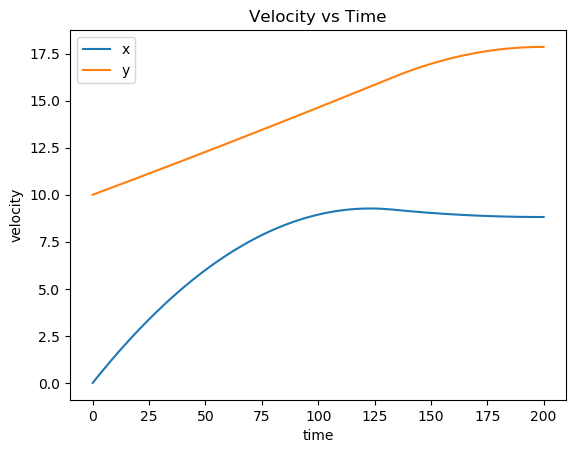

In [181]:
# Velocity plot
x = range(0, stop=time, length=time)
plot(x[:], getvalue(v_A)[1,:], label="x" )
plot(x[:], getvalue(v_A)[2,:], label="y" )
title("Velocity vs Time")
xlabel("time")
ylabel("velocity")
legend()
;

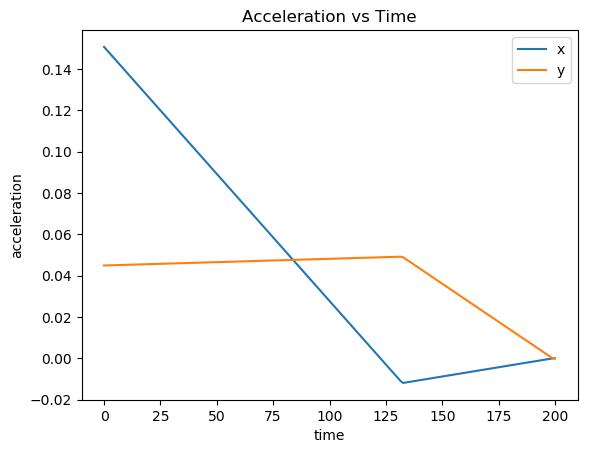

In [182]:
# Acceleration plot
x = range(0, stop=time, length=time)
plot(x[:], getvalue(u_A)[1,:], label="x" )
plot(x[:], getvalue(u_A)[2,:], label="y" )
title("Acceleration vs Time")
xlabel("time")
ylabel("acceleration")
legend()
;